# Simple password generator

## First idea

In [49]:
import numpy as np
import string as s

def passgen(
    pass_lenght=12, 
    numbers=True, 
    chars=True, 
    symbols=True, 
    upper=True):
    
    """
    Simple password maker and information about password strenght.
    """
    
    if (pass_lenght < 1 
        or numbers==False 
        and chars==False 
        and symbols==False 
        and upper==False):
    
        print("_"*105, "\nAt least lenght and one argument must be given.",
             "_"*105," ")
              
    else:
        
        pass_dictionary = []
    
        if numbers == True:
            pass_dictionary.extend(s.digits)
        if chars == True:
            pass_dictionary.extend(s.ascii_lowercase)
        if symbols == True:
            pass_dictionary.extend(s.punctuation)
        if upper == True:
            pass_dictionary.extend(s.ascii_uppercase)

        pass_dictionary_size = len(pass_dictionary)
        combinations = pass_dictionary_size**pass_lenght
        time_to_crack = ((1.7*10**-6*combinations)/2)/86400/365 
        
        password = "".join(np.random.choice(pass_dictionary, size=pass_lenght))        
        
        print(password)
        print("-"*82)
        print(f"Password elements: {pass_lenght}",
              f"\nPassword dictionary size: {pass_dictionary_size:,d}",
              f"\nPossible combinations: {combinations:,d}",
              f"\nTime to crack in years: ~{round(time_to_crack,1):,}",
              "(modern computer, 8 core, 2.8 GHz CPU)"
              f"\nTime to crack in years: ~{round(time_to_crack/100,1):,}",
              "(modern computer, with GPU or 3D card)",
              f"\nTime to crack in years: ~{round(time_to_crack/100000,1):,}",
              "(supercomputer or a botnet)")
        print("-"*82)


passgen(12,1,0,0,1)

H90W6VE7H1AD
----------------------------------------------------------------------------------
Password elements: 12 
Password dictionary size: 36 
Possible combinations: 4,738,381,338,321,616,896 
Time to crack in years: ~127,715.1 (modern computer, 8 core, 2.8 GHz CPU)
Time to crack in years: ~1,277.2 (modern computer, with GPU or 3D card) 
Time to crack in years: ~1.3 (supercomputer or a botnet)
----------------------------------------------------------------------------------


## GUI version

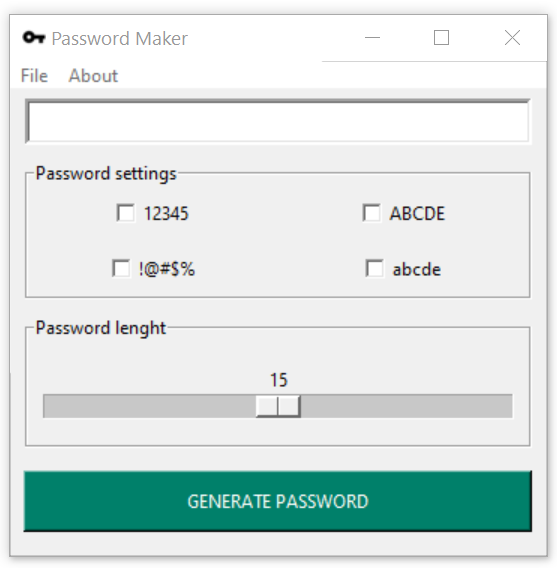

In [4]:
from IPython.display import Image
Image("password_maker.png", width=278, height=284)

In [16]:
import numpy as np
import string as s
import tkinter as tk

# creating main window
root = tk.Tk()
root.title("Password Maker")
root.iconbitmap("key.ico")
#root.resizable(False, False)
root.geometry("358x330")

# variables
LENGHT = tk.IntVar()
NUMBERS = tk.BooleanVar()
CHARACTERS = tk.BooleanVar()
UPPER = tk.BooleanVar()
SYMBOLS = tk.BooleanVar()

def passGen():
    
    lenght = LENGHT.get()
    numbers = NUMBERS.get()
    chars = CHARACTERS.get()
    symbols = SYMBOLS.get()
    upper = UPPER.get()
    
   
    if (lenght == 0 
        or numbers == 0 
        and chars == 0 
        and symbols == 0 
        and upper == 0):
        pass 
                
    else:
 
        bin = []
    
        if numbers == 1:
            bin.extend(s.digits)
        if chars == 1:
            bin.extend(s.ascii_lowercase)
        if symbols == 1:
            bin.extend(s.punctuation)
        if upper == 1:
            bin.extend(s.ascii_uppercase)
        
        passwd = "".join(np.random.choice(bin, size=lenght))
        e.delete(0,"end")
        e.insert(0,passwd)
        
# menus action
def create_window():
    about_window = tk.Toplevel(root)
    about_window.title("About")
    about_window.geometry("300x100")
    about_window.iconbitmap("key.ico")
    aboutlabel = tk.Label(about_window, text="\n\nCopyright Mark Montoya 2020\nVersion 1.0")
    aboutlabel.pack()
    
# creating menus
menubar = tk.Menu(root)
filemenu = tk.Menu(menubar, tearoff=0)
filemenu.add_command(label="Exit", command=root.destroy)
menubar.add_cascade(label="File", menu=filemenu)

aboutmenu = tk.Menu(menubar, tearoff=0)
menubar.add_cascade(label="About", command=create_window)
root.config(menu=menubar)

# creating output space 
e = tk.Entry(root, borderwidth=3, font=1, width=30)
e.grid(row=0, column=0, padx=10, pady=5)

# creating a settings frame 
settingsFrame = tk.LabelFrame(root, text="Password settings",width=300)
settingsFrame.grid(row=1, column=0, padx=10, pady=5)
settingsFrame.grid_propagate(1)

checkBox1 = tk.Checkbutton(settingsFrame, text="12345", onvalue=1, offvalue=0, anchor="w", variable=NUMBERS, padx=50,pady=5)
checkBox2 = tk.Checkbutton(settingsFrame, text="ABCDE", onvalue=1, offvalue=0, anchor="e", variable=UPPER, padx=50,pady=5)
checkBox3 = tk.Checkbutton(settingsFrame, text="!@#$%", onvalue=1, offvalue=0, anchor="w", variable=SYMBOLS, padx=50,pady=5)
checkBox4 = tk.Checkbutton(settingsFrame, text="abcde", onvalue=1, offvalue=0, anchor="e", variable=CHARACTERS, padx=50,pady=5)

checkBox1.grid(row=0,column=0, padx=2,pady=2)
checkBox2.grid(row=0,column=1, padx=2,pady=2)
checkBox3.grid(row=1,column=0, padx=2,pady=2)
checkBox4.grid(row=1,column=1, padx=2,pady=2)

# creating a lenght frame 
lenghtFrame = tk.LabelFrame(root, text="Password length", padx=2, pady=2, width=300)
lenghtFrame.grid(row=3,column=0, padx=10, pady=5)
settingsFrame.grid_propagate(1)

passLenght = tk.Scale(lenghtFrame, from_=0, to=30, orient="horizontal", length=314, variable=LENGHT)
passLenght.set(15)

passLenght.grid(row=2,column=0, padx=5,pady=12)

# creating a pass gen button 
generate = tk.Button(root,text="GENERATE PASSWORD",height=2, width=47, foreground="white", background="#00806A", command=passGen)
generate.grid(row=4,column=0, padx=5,pady=10)

root.mainloop()

## GUI version enhanced
New feature: 
- Saving passwords to a file

In [9]:
import os
import numpy as np
import string
import tkinter as tk
from tkinter import filedialog
from datetime import datetime

# Global variable to store the file path
file_path = None

def generate_password():
    length = length_var.get()
    include_numbers = numbers_var.get()
    include_characters = characters_var.get()
    include_uppercase = uppercase_var.get()
    include_symbols = symbols_var.get()

    # Ensure at least one option is selected
    if not any([include_numbers, include_characters, include_uppercase, include_symbols]) or length == 0:
        return
    
    character_set = []
    if include_numbers:
        character_set.extend(string.digits)
    if include_characters:
        character_set.extend(string.ascii_lowercase)
    if include_symbols:
        character_set.extend(string.punctuation)
    if include_uppercase:
        character_set.extend(string.ascii_uppercase)

    generated_password = "".join(np.random.choice(character_set, size=length))
    password_entry.delete(0, "end")
    password_entry.insert(0, generated_password)

    # Save password to the chosen file if the checkbox is checked
    if save_passwords_var.get():
        save_password_to_file(generated_password)

def save_password_to_file(password):
    global file_path

    # Prompt the user with a file dialog to choose where to save the file if file_path is not set
    if file_path is None:
        suggested_file_name = f"my_passwords_session_{datetime.now().strftime('%Y%m%d_%H%M')}.txt"
        file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt"), ("All files", "*.*")], initialfile=suggested_file_name)

        # Check if the user canceled the file dialog
        if not file_path:
            return

    # If the file does not exist, create a new file with the chosen file path
    if not os.path.isfile(file_path):
        with open(file_path, "w") as file:
            timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            file.write(f"Session Date: {timestamp}\n\n")

    # Append the password to the existing file
    with open(file_path, "a") as file:
        file.write(f"{password}\n")

def clear_session_files():
    global file_path
    # Remove all files starting with "my_passwords_session_"
    for file_name in os.listdir():
        if file_name.startswith("my_passwords_session_") and file_name.endswith(".txt"):
            os.remove(file_name)
    file_path = None

def show_about_window():
    about_window = tk.Toplevel(root)
    about_window.title("About")
    about_window.geometry("300x100")
    about_window.iconbitmap("key.ico")
    about_label = tk.Label(about_window, text="\n\nCopyright Mark Montoya 2020\nVersion 1.1")
    about_label.pack()

# Creating main window
root = tk.Tk()
root.title("Password Maker")
root.iconbitmap("key.ico")
root.geometry("358x420")

# Variables
length_var = tk.IntVar()
numbers_var = tk.BooleanVar()
characters_var = tk.BooleanVar()
uppercase_var = tk.BooleanVar()
symbols_var = tk.BooleanVar()
save_passwords_var = tk.BooleanVar()

# Creating menus
menubar = tk.Menu(root)

file_menu = tk.Menu(menubar, tearoff=0)
file_menu.add_command(label="Exit", command=root.destroy)
menubar.add_cascade(label="File", menu=file_menu)

# Adding the About menu on the right of the File menu
menubar.add_command(label="About", command=show_about_window)

root.config(menu=menubar)

# Clear the session files when starting a new session
clear_session_files()

# Creating output space 
password_entry = tk.Entry(root, borderwidth=3, font=1, width=30)
password_entry.grid(row=0, column=0, padx=10, pady=5)

# Creating a settings frame 
settings_frame = tk.LabelFrame(root, text="Password settings", width=300)
settings_frame.grid(row=1, column=0, padx=10, pady=5)
settings_frame.grid_propagate(1)

# Checkbuttons for character options
check_box_numbers = tk.Checkbutton(settings_frame, text="12345", onvalue=True, offvalue=False, anchor="w", variable=numbers_var, padx=50, pady=5)
check_box_uppercase = tk.Checkbutton(settings_frame, text="ABCDE", onvalue=True, offvalue=False, anchor="e", variable=uppercase_var, padx=50, pady=5)
check_box_symbols = tk.Checkbutton(settings_frame, text="!@#$%", onvalue=True, offvalue=False, anchor="w", variable=symbols_var, padx=50, pady=5)
check_box_characters = tk.Checkbutton(settings_frame, text="abcde", onvalue=True, offvalue=False, anchor="e", variable=characters_var, padx=50, pady=5)

check_box_numbers.grid(row=0, column=0, padx=2, pady=2)
check_box_uppercase.grid(row=0, column=1, padx=2, pady=2)
check_box_symbols.grid(row=1, column=0, padx=2, pady=2)
check_box_characters.grid(row=1, column=1, padx=2, pady=2)

# Creating a length frame 
length_frame = tk.LabelFrame(root, text="Password length", padx=2, pady=2, width=300)
length_frame.grid(row=3, column=0, padx=10, pady=5)
length_frame.grid_propagate(1)

# Scale widget for password length
password_length_scale = tk.Scale(length_frame, from_=0, to=30, orient="horizontal", length=314, variable=length_var)
password_length_scale.set(15)
password_length_scale.grid(row=2, column=0, padx=5, pady=12)

# Creating a password generation button 
generate_button = tk.Button(root, text="GENERATE PASSWORD", height=2, width=47, foreground="white", background="#00806A", command=generate_password)
generate_button.grid(row=4, column=0, padx=5, pady=10)

# Creating a frame for saving passwords to a file
save_passwords_frame = tk.Frame(root, width=300)
save_passwords_frame.grid(row=5, column=0, padx=10, pady=5)
save_passwords_frame.grid_propagate(1)

# Checkbutton for saving passwords to a file
check_box_save_passwords = tk.Checkbutton(save_passwords_frame, text="Save passwords to a file", variable=save_passwords_var)
check_box_save_passwords.pack(pady=5)

# Start the main loop
root.mainloop()


## GUI version enhanced
New feature and minor changes: 
- Password strength indicator
- Added comments

In [10]:
import os
import numpy as np
import string
import tkinter as tk
from tkinter import filedialog
from datetime import datetime

# Global variable to store the file path
file_path = None

def calculate_password_strength(password):
    # Define your own criteria for password strength
    length_score = min(len(password) // 10, 3)  # Adjusted for 1/10
    uppercase_score = 1 if any(char.isupper() for char in password) else 0
    digit_score = 1 if any(char.isdigit() for char in password) else 0
    symbol_score = 1 if any(char in string.punctuation for char in password) else 0

    total_score = length_score + uppercase_score + digit_score + symbol_score
    return min(total_score, 4)  # Cap the total score at 4

def update_password_strength_indicator(password):
    strength_score = calculate_password_strength(password)
    strength_label.config(text=f"Password Strength: {strength_score}/4")
    
    # Update the strength bar color
    strength_color = get_strength_color(strength_score)
    strength_bar.config(bg=strength_color)

def get_strength_color(score):
    # Map the strength score to a color (red to green)
    colors = ["#FF0000", "#FF4500", "#FFA500", "#FFD700", "#7CFC00"]
    return colors[min(score, len(colors) - 1)]

def generate_password():
    length = length_var.get()
    include_numbers = numbers_var.get()
    include_characters = characters_var.get()
    include_uppercase = uppercase_var.get()
    include_symbols = symbols_var.get()

    # Ensure at least one option is selected
    if not any([include_numbers, include_characters, include_uppercase, include_symbols]) or length == 0:
        return
    
    character_set = []
    if include_numbers:
        character_set.extend(string.digits)
    if include_characters:
        character_set.extend(string.ascii_lowercase)
    if include_symbols:
        character_set.extend(string.punctuation)
    if include_uppercase:
        character_set.extend(string.ascii_uppercase)

    generated_password = "".join(np.random.choice(character_set, size=length))
    password_entry.delete(0, "end")
    password_entry.insert(0, generated_password)

    # Save password to the chosen file if the checkbox is checked
    if save_passwords_var.get():
        save_password_to_file(generated_password)

    # Update the password strength indicator
    update_password_strength_indicator(generated_password)

def save_password_to_file(password):
    global file_path

    # Prompt the user with a file dialog to choose where to save the file if file_path is not set
    if file_path is None:
        suggested_file_name = f"my_passwords_session_{datetime.now().strftime('%Y%m%d_%H%M')}.txt"
        file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt"), ("All files", "*.*")], initialfile=suggested_file_name)

        # Check if the user canceled the file dialog
        if not file_path:
            return

    # If the file does not exist, create a new file with the chosen file path
    if not os.path.isfile(file_path):
        with open(file_path, "w") as file:
            timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            file.write(f"Session Date: {timestamp}\n\n")

    # Append the password to the existing file
    with open(file_path, "a") as file:
        file.write(f"{password}\n")

def clear_session_files():
    global file_path
    # Remove all files starting with "my_passwords_session_"
    for file_name in os.listdir():
        if file_name.startswith("my_passwords_session_") and file_name.endswith(".txt"):
            os.remove(file_name)
    file_path = None

def show_about_window():
    about_window = tk.Toplevel(root)
    about_window.title("About")
    about_window.geometry("300x100")
    about_window.iconbitmap("key.ico")
    about_label = tk.Label(about_window, text="\n\nCopyright Mark Montoya 2020\nVersion 1.2")
    about_label.pack()

# Creating main window
root = tk.Tk()
root.title("Password Maker")
root.iconbitmap("key.ico")
root.geometry("358x480")

# Variables
length_var = tk.IntVar()
numbers_var = tk.BooleanVar()
characters_var = tk.BooleanVar()
uppercase_var = tk.BooleanVar()
symbols_var = tk.BooleanVar()
save_passwords_var = tk.BooleanVar()

# Creating menus
menubar = tk.Menu(root)

file_menu = tk.Menu(menubar, tearoff=0)
file_menu.add_command(label="Exit", command=root.destroy)
menubar.add_cascade(label="File", menu=file_menu)

# Adding the About menu on the right of the File menu
menubar.add_command(label="About", command=show_about_window)

root.config(menu=menubar)

# Clear the session files when starting a new session
clear_session_files()

# Creating output space 
password_entry = tk.Entry(root, borderwidth=3, font=1, width=30)
password_entry.grid(row=0, column=0, padx=10, pady=5)

# Creating a settings frame 
settings_frame = tk.LabelFrame(root, text="Password settings", width=300)
settings_frame.grid(row=1, column=0, padx=10, pady=5)
settings_frame.grid_propagate(1)

# Checkbuttons for character options
check_box_numbers = tk.Checkbutton(settings_frame, text="12345", onvalue=True, offvalue=False, anchor="w", variable=numbers_var, padx=50, pady=5)
check_box_uppercase = tk.Checkbutton(settings_frame, text="ABCDE", onvalue=True, offvalue=False, anchor="e", variable=uppercase_var, padx=50, pady=5)
check_box_symbols = tk.Checkbutton(settings_frame, text="!@#$%", onvalue=True, offvalue=False, anchor="w", variable=symbols_var, padx=50, pady=5)
check_box_characters = tk.Checkbutton(settings_frame, text="abcde", onvalue=True, offvalue=False, anchor="e", variable=characters_var, padx=50, pady=5)

check_box_numbers.grid(row=0, column=0, padx=2, pady=2)
check_box_uppercase.grid(row=0, column=1, padx=2, pady=2)
check_box_symbols.grid(row=1, column=0, padx=2, pady=2)
check_box_characters.grid(row=1, column=1, padx=2, pady=2)

# Creating a length frame 
length_frame = tk.LabelFrame(root, text="Password length", padx=2, pady=2, width=300)
length_frame.grid(row=3, column=0, padx=10, pady=5)
length_frame.grid_propagate(1)

# Scale widget for password length
password_length_scale = tk.Scale(length_frame, from_=0, to=30, orient="horizontal", length=314, variable=length_var)
password_length_scale.set(15)
password_length_scale.grid(row=2, column=0, padx=5, pady=12)

# Creating a password generation button 
generate_button = tk.Button(root, text="GENERATE PASSWORD", height=2, width=47, foreground="white", background="#00806A", command=generate_password)
generate_button.grid(row=4, column=0, padx=5, pady=10)

# Creating a frame for saving passwords to a file
save_passwords_frame = tk.Frame(root, width=300)
save_passwords_frame.grid(row=5, column=0, padx=10, pady=5)
save_passwords_frame.grid_propagate(1)

# Checkbutton for saving passwords to a file
check_box_save_passwords = tk.Checkbutton(save_passwords_frame, text="Save passwords to a file", variable=save_passwords_var)
check_box_save_passwords.pack(pady=5)

# Creating a password strength indicator label
strength_label = tk.Label(root, text="Password Strength: ", font="Helvetica 10 bold")
strength_label.grid(row=6, column=0, padx=10, pady=5)

# Creating a strength bar
strength_bar = tk.Frame(root, height=10, width=300, bg="#D3D3D3")  # Default color is light gray
strength_bar.grid(row=7, column=0, padx=10, pady=5)

# Update the password strength indicator initially
update_password_strength_indicator("")

# Start the main loop
root.mainloop()


## GUI version enhanced
New feature and minor changes: 
- Changing the way the passwords are stored
- Added docstrings

In [11]:
import os
import numpy as np
import string
import tkinter as tk
from tkinter import filedialog
from datetime import datetime

# Global variable to store the file path
file_path = None

def calculate_password_strength(password):
    """
    Calculate the strength of a password based on length, character types, etc.

    Parameters:
    - password (str): The password to be evaluated.

    Returns:
    - int: A score representing the password strength (between 0 and 4).
    """
    # Define your own criteria for password strength
    length_score = min(len(password) // 10, 3)  # Adjusted for 1/10
    uppercase_score = 1 if any(char.isupper() for char in password) else 0
    digit_score = 1 if any(char.isdigit() for char in password) else 0
    symbol_score = 1 if any(char in string.punctuation for char in password) else 0

    total_score = length_score + uppercase_score + digit_score + symbol_score
    return min(total_score, 4)  # Cap the total score at 4

def update_password_strength_indicator(password):
    """
    Update the password strength indicator label and color-coded strength bar.

    Parameters:
    - password (str): The password to be evaluated.
    """
    strength_score = calculate_password_strength(password)
    strength_label.config(text=f"Password Strength: {strength_score}/4")
    
    # Update the strength bar color
    strength_color = get_strength_color(strength_score)
    strength_bar.config(bg=strength_color)

def get_strength_color(score):
    """
    Map the strength score to a color for the strength bar.

    Parameters:
    - score (int): The strength score.

    Returns:
    - str: Hex color code.
    """
    # Map the strength score to a color (red to green)
    colors = ["#FF0000", "#FF4500", "#FFA500", "#FFD700", "#7CFC00"]
    return colors[min(score, len(colors) - 1)]

def generate_password():
    """
    Generate a password based on user-selected criteria and update the UI.
    """
    length = length_var.get()
    include_numbers = numbers_var.get()
    include_characters = characters_var.get()
    include_uppercase = uppercase_var.get()
    include_symbols = symbols_var.get()

    # Ensure at least one option is selected
    if not any([include_numbers, include_characters, include_uppercase, include_symbols]) or length == 0:
        return
    
    character_set = []
    if include_numbers:
        character_set.extend(string.digits)
    if include_characters:
        character_set.extend(string.ascii_lowercase)
    if include_symbols:
        character_set.extend(string.punctuation)
    if include_uppercase:
        character_set.extend(string.ascii_uppercase)

    generated_password = "".join(np.random.choice(character_set, size=length))
    password_entry.delete(0, "end")
    password_entry.insert(0, generated_password)

    # Save password to the chosen file if the checkbox is checked
    if save_passwords_var.get():
        save_password_to_file(generated_password)

    # Update the password strength indicator
    update_password_strength_indicator(generated_password)

def save_password_to_file(password):
    """
    Save the password to a file.

    Parameters:
    - password (str): The password to be saved.
    """
    global file_path

    # Prompt the user with a file dialog to choose where to save the file if file_path is not set
    if file_path is None:
        suggested_file_name = f"my_passwords_session_{datetime.now().strftime('%Y%m%d_%H%M')}.txt"
        file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt"), ("All files", "*.*")], initialfile=suggested_file_name)

        # Check if the user canceled the file dialog
        if not file_path:
            return

    # If the file does not exist, create a new file with the chosen file path
    if not os.path.isfile(file_path):
        with open(file_path, "w") as file:
            timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            file.write(f"Session Date: {timestamp}\n\n")

    # Append the password to the existing file
    with open(file_path, "a") as file:
        file.write(f"{password}\n")

def clear_session_files():
    """
    Clear session files starting with "my_passwords_session_".
    """
    global file_path
    # Remove all files starting with "my_passwords_session_"
    for file_name in os.listdir():
        if file_name.startswith("my_passwords_session_") and file_name.endswith(".txt"):
            os.remove(file_name)
    file_path = None

def show_about_window():
    """
    Display the About window.
    """
    about_window = tk.Toplevel(root)
    about_window.title("About")
    about_window.geometry("300x100")
    about_window.iconbitmap("key.ico")
    about_label = tk.Label(about_window, text="\n\nCopyright Mark Montoya 2023\nVersion 1.3")
    about_label.pack()

# Creating main window
root = tk.Tk()
root.title("Password Maker")
root.iconbitmap("key.ico")
root.geometry("358x480")

# Variables
length_var = tk.IntVar()
numbers_var = tk.BooleanVar()
characters_var = tk.BooleanVar()
uppercase_var = tk.BooleanVar()
symbols_var = tk.BooleanVar()
save_passwords_var = tk.BooleanVar()

# Creating menus
menubar = tk.Menu(root)

file_menu = tk.Menu(menubar, tearoff=0)
file_menu.add_command(label="Exit", command=root.destroy)
menubar.add_cascade(label="File", menu=file_menu)

# Adding the About menu on the right of the File menu
menubar.add_command(label="About", command=show_about_window)

root.config(menu=menubar)

# Clear the session files when starting a new session
clear_session_files()

# Creating output space 
password_entry = tk.Entry(root, borderwidth=3, font=1, width=30)
password_entry.grid(row=0, column=0, padx=10, pady=5)

# Creating a settings frame 
settings_frame = tk.LabelFrame(root, text="Password settings", width=300)
settings_frame.grid(row=1, column=0, padx=10, pady=5)
settings_frame.grid_propagate(1)

# Checkbuttons for character options
check_box_numbers = tk.Checkbutton(settings_frame, text="12345", onvalue=True, offvalue=False, anchor="w", variable=numbers_var, padx=50, pady=5)
check_box_uppercase = tk.Checkbutton(settings_frame, text="ABCDE", onvalue=True, offvalue=False, anchor="e", variable=uppercase_var, padx=50, pady=5)
check_box_symbols = tk.Checkbutton(settings_frame, text="!@#$%", onvalue=True, offvalue=False, anchor="w", variable=symbols_var, padx=50, pady=5)
check_box_characters = tk.Checkbutton(settings_frame, text="abcde", onvalue=True, offvalue=False, anchor="e", variable=characters_var, padx=50, pady=5)

check_box_numbers.grid(row=0, column=0, padx=2, pady=2)
check_box_uppercase.grid(row=0, column=1, padx=2, pady=2)
check_box_symbols.grid(row=1, column=0, padx=2, pady=2)
check_box_characters.grid(row=1, column=1, padx=2, pady=2)

# Creating a length frame 
length_frame = tk.LabelFrame(root, text="Password length", padx=2, pady=2, width=300)
length_frame.grid(row=3, column=0, padx=10, pady=5)
length_frame.grid_propagate(1)

# Scale widget for password length
password_length_scale = tk.Scale(length_frame, from_=0, to=30, orient="horizontal", length=314, variable=length_var)
password_length_scale.set(15)
password_length_scale.grid(row=2, column=0, padx=5, pady=12)

# Creating a password generation button 
generate_button = tk.Button(root, text="GENERATE PASSWORD", height=2, width=47, foreground="white", background="#00806A", command=generate_password)
generate_button.grid(row=4, column=0, padx=5, pady=10)

# Creating a frame for saving passwords to a file
save_passwords_frame = tk.Frame(root, width=300)
save_passwords_frame.grid(row=5, column=0, padx=10, pady=5)
save_passwords_frame.grid_propagate(1)

# Checkbutton for saving passwords to a file
check_box_save_passwords = tk.Checkbutton(save_passwords_frame, text="Save passwords to a file", variable=save_passwords_var)
check_box_save_passwords.pack(pady=5)

# Creating a password strength indicator label
strength_label = tk.Label(root, text="Password Strength: ", font="Helvetica 10 bold")
strength_label.grid(row=6, column=0, padx=10, pady=5)

# Creating a strength bar
strength_bar = tk.Frame(root, height=10, width=300, bg="#D3D3D3")  # Default color is light gray
strength_bar.grid(row=7, column=0, padx=10, pady=5)

# Update the password strength indicator initially
update_password_strength_indicator("")

# Start the main loop
root.mainloop()


## GUI version enhanced
New feature and minor changes: 
- Copy to clipboard

In [12]:
import os
import numpy as np
import string
import tkinter as tk
from tkinter import filedialog
from datetime import datetime
import pyperclip  # Added for clipboard functionality

# Global variable to store the file path
file_path = None

def calculate_password_strength(password):
    """
    Calculate the strength of a password based on length, character types, etc.

    Parameters:
    - password (str): The password to be evaluated.

    Returns:
    - int: A score representing the password strength (between 0 and 4).
    """
    # Define your own criteria for password strength
    length_score = min(len(password) // 10, 3)  # Adjusted for 1/10
    uppercase_score = 1 if any(char.isupper() for char in password) else 0
    digit_score = 1 if any(char.isdigit() for char in password) else 0
    symbol_score = 1 if any(char in string.punctuation for char in password) else 0

    total_score = length_score + uppercase_score + digit_score + symbol_score
    return min(total_score, 4)  # Cap the total score at 4

def update_password_strength_indicator(password):
    """
    Update the password strength indicator label and color-coded strength bar.

    Parameters:
    - password (str): The password to be evaluated.
    """
    try:
        strength_score = calculate_password_strength(password)
        strength_label.config(text=f"Password Strength: {strength_score}/4")

        # Update the strength bar color
        strength_color = get_strength_color(strength_score)
        strength_bar.config(bg=strength_color)
    except Exception as e:
        print(f"Error calculating password strength: {e}")

def get_strength_color(score):
    """
    Map the strength score to a color for the strength bar.

    Parameters:
    - score (int): The strength score.

    Returns:
    - str: Hex color code.
    """
    try:
        # Map the strength score to a color (red to green)
        colors = ["#FF0000", "#FF4500", "#FFA500", "#FFD700", "#7CFC00"]
        return colors[min(score, len(colors) - 1)]
    except Exception as e:
        print(f"Error getting strength color: {e}")
        return "#D3D3D3"  # Default color is light gray

def generate_password():
    """
    Generate a password based on user-selected criteria and update the UI.
    """
    try:
        length = length_var.get()
        include_numbers = numbers_var.get()
        include_characters = characters_var.get()
        include_uppercase = uppercase_var.get()
        include_symbols = symbols_var.get()

        if not any([include_numbers, include_characters, include_uppercase, include_symbols]) or length == 0:
            return

        character_set = []
        if include_numbers:
            character_set.extend(string.digits)
        if include_characters:
            character_set.extend(string.ascii_lowercase)
        if include_symbols:
            character_set.extend(string.punctuation)
        if include_uppercase:
            character_set.extend(string.ascii_uppercase)

        generated_password = "".join(np.random.choice(character_set, size=length))
        password_entry.delete(0, "end")
        password_entry.insert(0, generated_password)

        if save_passwords_var.get():
            save_password_to_file(generated_password)

        update_password_strength_indicator(generated_password)

    except Exception as e:
        print(f"Error generating password: {e}")

def save_password_to_file(password):
    """
    Save the password to a file.

    Parameters:
    - password (str): The password to be saved.
    """
    global file_path

    try:
        if file_path is None:
            suggested_file_name = f"my_passwords_session_{datetime.now().strftime('%Y%m%d_%H%M')}.txt"
            file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt"), ("All files", "*.*")], initialfile=suggested_file_name)

            if not file_path:
                return

        if not os.path.isfile(file_path):
            with open(file_path, "w") as file:
                timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                file.write(f"Session Date: {timestamp}\n\n")

        with open(file_path, "a") as file:
            file.write(f"{password}\n")

    except Exception as e:
        print(f"Error saving password to file: {e}")

def clear_session_files():
    """
    Clear session files starting with "my_passwords_session_".
    """
    global file_path
    try:
        for file_name in os.listdir():
            if file_name.startswith("my_passwords_session_") and file_name.endswith(".txt"):
                os.remove(file_name)
        file_path = None
    except Exception as e:
        print(f"Error clearing session files: {e}")

def show_about_window():
    """
    Display the About window.
    """
    try:
        about_window = tk.Toplevel(root)
        about_window.title("About")
        about_window.geometry("300x100")
        about_window.iconbitmap("key.ico")
        about_label = tk.Label(about_window, text="\n\nCopyright Mark Montoya 2023\nVersion 1.4")
        about_label.pack()
    except Exception as e:
        print(f"Error showing about window: {e}")

def copy_to_clipboard():
    """
    Copy the generated password to the clipboard.
    """
    try:
        generated_password = password_entry.get()
        if generated_password:
            pyperclip.copy(generated_password)
            print("Password copied to clipboard.")
    except Exception as e:
        print(f"Error copying password to clipboard: {e}")

# Creating main window
root = tk.Tk()
root.title("Password Maker")
root.iconbitmap("key.ico")
root.geometry("358x480")

# Variables
length_var = tk.IntVar()
numbers_var = tk.BooleanVar()
characters_var = tk.BooleanVar()
uppercase_var = tk.BooleanVar()
symbols_var = tk.BooleanVar()
save_passwords_var = tk.BooleanVar()

# Creating menus
menubar = tk.Menu(root)

file_menu = tk.Menu(menubar, tearoff=0)
menubar.add_cascade(label="File", menu=file_menu)
file_menu.add_command(label="Exit", command=root.destroy)

menubar.add_command(label="About", command=show_about_window)

root.config(menu=menubar)

clear_session_files()

# Creating output space 
password_entry = tk.Entry(root, borderwidth=3, font=1, width=30)
password_entry.grid(row=0, column=0, padx=10, pady=5)

# Creating a settings frame 
settings_frame = tk.LabelFrame(root, text="Password settings", width=300)
settings_frame.grid(row=1, column=0, padx=10, pady=5)
settings_frame.grid_propagate(1)

check_box_numbers = tk.Checkbutton(settings_frame, text="12345", onvalue=True, offvalue=False, anchor="w", variable=numbers_var, padx=50, pady=5)
check_box_uppercase = tk.Checkbutton(settings_frame, text="ABCDE", onvalue=True, offvalue=False, anchor="e", variable=uppercase_var, padx=50, pady=5)
check_box_symbols = tk.Checkbutton(settings_frame, text="!@#$%", onvalue=True, offvalue=False, anchor="w", variable=symbols_var, padx=50, pady=5)
check_box_characters = tk.Checkbutton(settings_frame, text="abcde", onvalue=True, offvalue=False, anchor="e", variable=characters_var, padx=50, pady=5)

check_box_numbers.grid(row=0, column=0, padx=2, pady=2)
check_box_uppercase.grid(row=0, column=1, padx=2, pady=2)
check_box_symbols.grid(row=1, column=0, padx=2, pady=2)
check_box_characters.grid(row=1, column=1, padx=2, pady=2)

# Creating a length frame 
length_frame = tk.LabelFrame(root, text="Password length", padx=2, pady=2, width=300)
length_frame.grid(row=3, column=0, padx=10, pady=5)
length_frame.grid_propagate(1)

password_length_scale = tk.Scale(length_frame, from_=0, to=30, orient="horizontal", length=314, variable=length_var)
password_length_scale.set(15)
password_length_scale.grid(row=2, column=0, padx=5, pady=12)

# Creating a password generation button 
generate_button = tk.Button(root, text="GENERATE PASSWORD", height=2, width=47, foreground="white", background="#00806A", command=generate_password)
generate_button.grid(row=4, column=0, padx=5, pady=10)

# Creating a frame for saving passwords to a file
save_passwords_frame = tk.Frame(root, width=300)
save_passwords_frame.grid(row=5, column=0, padx=10, pady=5)
save_passwords_frame.grid_propagate(1)

check_box_save_passwords = tk.Checkbutton(save_passwords_frame, text="Save passwords to a file", variable=save_passwords_var)
check_box_save_passwords.pack(pady=5)

# Creating a password strength indicator label
strength_label = tk.Label(root, text="Password Strength: ", font="Helvetica 10 bold")
strength_label.grid(row=6, column=0, padx=10, pady=5)

# Creating a strength bar
strength_bar = tk.Frame(root, height=10, width=300, bg="#D3D3D3")
strength_bar.grid(row=7, column=0, padx=10, pady=5)

# Creating a copy to clipboard button
clipboard_button = tk.Button(root, text="COPY TO CLIPBOARD", height=2, width=47, foreground="white", background="#00806A", command=copy_to_clipboard)
clipboard_button.grid(row=8, column=0, padx=5, pady=10)

# Update the password strength indicator initially
update_password_strength_indicator("")

# Start the main loop
root.mainloop()


## GUI version enhanced
New feature and other changes: 
- Changing the way passwords are stored. Now now they are keept in memory and with "save as" feautures seved to a file
- Changing the copy to clipbord button location
- Changest to main menu
- GUI small reorganization

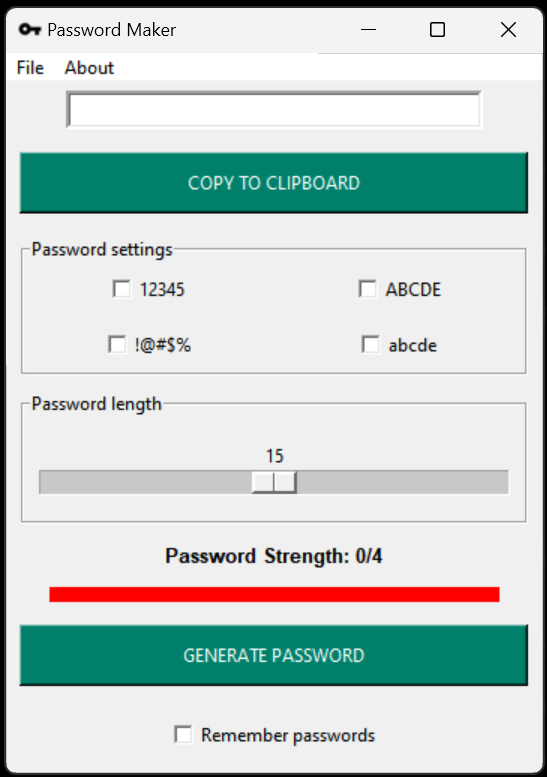

In [2]:
from IPython.display import Image
Image("password_maker_enhanced.png", width=278, height=284)

In [18]:
import os
import numpy as np
import string
import tkinter as tk
from tkinter import filedialog
from datetime import datetime
import pyperclip  # Added for clipboard functionality

# Global variable to store the file path
file_path = None
remember_passwords = False
temp_passwords = []  # Temporary memory to store passwords when "Remember passwords" is checked

def calculate_password_strength(password):
    """
    Calculate the strength of a password based on length, character types, etc.

    Parameters:
    - password (str): The password to be evaluated.

    Returns:
    - int: A score representing the password strength (between 0 and 4).
    """
    # Define your own criteria for password strength
    length_score = min(len(password) // 10, 3)  # Adjusted for 1/10
    uppercase_score = 1 if any(char.isupper() for char in password) else 0
    digit_score = 1 if any(char.isdigit() for char in password) else 0
    symbol_score = 1 if any(char in string.punctuation for char in password) else 0

    total_score = length_score + uppercase_score + digit_score + symbol_score
    return min(total_score, 4)  # Cap the total score at 4

def update_password_strength_indicator(password):
    """
    Update the password strength indicator label and color-coded strength bar.

    Parameters:
    - password (str): The password to be evaluated.
    """
    try:
        strength_score = calculate_password_strength(password)
        strength_label.config(text=f"Password Strength: {strength_score}/4")

        # Update the strength bar color
        strength_color = get_strength_color(strength_score)
        strength_bar.config(bg=strength_color)
    except Exception as e:
        print(f"Error calculating password strength: {e}")

def get_strength_color(score):
    """
    Map the strength score to a color for the strength bar.

    Parameters:
    - score (int): The strength score.

    Returns:
    - str: Hex color code.
    """
    try:
        # Map the strength score to a color (red to green)
        colors = ["#FF0000", "#FF4500", "#FFA500", "#FFD700", "#7CFC00"]
        return colors[min(score, len(colors) - 1)]
    except Exception as e:
        print(f"Error getting strength color: {e}")
        return "#D3D3D3"  # Default color is light gray

def generate_password():
    """
    Generate a password based on user-selected criteria and update the UI.
    """
    try:
        length = length_var.get()
        include_numbers = numbers_var.get()
        include_characters = characters_var.get()
        include_uppercase = uppercase_var.get()
        include_symbols = symbols_var.get()

        if not any([include_numbers, include_characters, include_uppercase, include_symbols]) or length == 0:
            return

        character_set = []
        if include_numbers:
            character_set.extend(string.digits)
        if include_characters:
            character_set.extend(string.ascii_lowercase)
        if include_symbols:
            character_set.extend(string.punctuation)
        if include_uppercase:
            character_set.extend(string.ascii_uppercase)

        generated_password = "".join(np.random.choice(character_set, size=length))
        password_entry.delete(0, "end")
        password_entry.insert(0, generated_password)

        if remember_passwords:
            temp_passwords.append(generated_password)

        update_password_strength_indicator(generated_password)

    except Exception as e:
        print(f"Error generating password: {e}")

def save_passwords_to_file():
    """
    Save the passwords to a file.

    This function is called when the user chooses "Save as..." from the file menu.
    """
    global file_path

    try:
        if remember_passwords and temp_passwords:
            suggested_file_name = f"my_passwords_session_{datetime.now().strftime('%Y%m%d_%H%M')}.txt"
            file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt"), ("All files", "*.*")], initialfile=suggested_file_name)

            if not file_path:
                return

            with open(file_path, "w") as file:
                timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                file.write(f"Session Date: {timestamp}\n\n")

                for password in temp_passwords:
                    file.write(f"{password}\n")

            temp_passwords.clear()
            print("Passwords saved to file.")

    except Exception as e:
        print(f"Error saving passwords to file: {e}")

def clear_session_files():
    """
    Clear session files starting with "my_passwords_session_".
    """
    global file_path
    try:
        for file_name in os.listdir():
            if file_name.startswith("my_passwords_session_") and file_name.endswith(".txt"):
                os.remove(file_name)
        file_path = None
    except Exception as e:
        print(f"Error clearing session files: {e}")

def toggle_remember_passwords():
    """
    Toggle the state of the "Remember passwords" checkbox.
    """
    global remember_passwords
    remember_passwords = not remember_passwords

def copy_to_clipboard():
    """
    Copy the generated password to the clipboard.
    """
    try:
        password = password_entry.get()
        if password:
            pyperclip.copy(password)
            print("Password copied to clipboard.")
    except Exception as e:
        print(f"Error copying password to clipboard: {e}")

def show_about_window():
    """
    Display an About window with information about the program author.
    """
    about_window = tk.Toplevel(root)
    about_window.title("About Password Maker")
    about_window.geometry("300x150")

    author_label = tk.Label(about_window, text="Password Maker\n\nAuthor: Mark Montoya\nVersion: 1.5\n11.2020", font="Helvetica 10")
    author_label.pack(padx=20, pady=10)

# Creating main window
root = tk.Tk()
root.title("Password Maker")
root.iconbitmap("key.ico")
root.geometry("358x480")

# Variables
length_var = tk.IntVar()
numbers_var = tk.BooleanVar()
characters_var = tk.BooleanVar()
uppercase_var = tk.BooleanVar()
symbols_var = tk.BooleanVar()

# Creating menus
menubar = tk.Menu(root)

file_menu = tk.Menu(menubar, tearoff=0)
file_menu.add_command(label="Save as...", command=save_passwords_to_file)  # Moved "Save as..." option
file_menu.add_command(label="Exit", command=root.destroy)  # Moved "Exit" option
menubar.add_cascade(label="File", menu=file_menu)

menubar.add_command(label="About", command=show_about_window)

root.config(menu=menubar)

clear_session_files()

# Creating output space
password_entry = tk.Entry(root, borderwidth=3, font=1, width=30)
password_entry.grid(row=1, column=0, padx=10, pady=5)

# Creating a copy to clipboard button
clipboard_button = tk.Button(root, text="COPY TO CLIPBOARD", height=2, width=47, foreground="white", background="#00806A", command=copy_to_clipboard)
clipboard_button.grid(row=2, column=0, padx=5, pady=10)

# Creating a settings frame
settings_frame = tk.LabelFrame(root, text="Password settings", width=300)
settings_frame.grid(row=3, column=0, padx=10, pady=5)
settings_frame.grid_propagate(1)

check_box_numbers = tk.Checkbutton(settings_frame, text="12345", onvalue=True, offvalue=False, anchor="w", variable=numbers_var, padx=50, pady=5)
check_box_uppercase = tk.Checkbutton(settings_frame, text="ABCDE", onvalue=True, offvalue=False, anchor="e", variable=uppercase_var, padx=50, pady=5)
check_box_symbols = tk.Checkbutton(settings_frame, text="!@#$%", onvalue=True, offvalue=False, anchor="w", variable=symbols_var, padx=50, pady=5)
check_box_characters = tk.Checkbutton(settings_frame, text="abcde", onvalue=True, offvalue=False, anchor="e", variable=characters_var, padx=50, pady=5)

check_box_numbers.grid(row=0, column=0, padx=2, pady=2)
check_box_uppercase.grid(row=0, column=1, padx=2, pady=2)
check_box_symbols.grid(row=1, column=0, padx=2, pady=2)
check_box_characters.grid(row=1, column=1, padx=2, pady=2)

# Creating a length frame
length_frame = tk.LabelFrame(root, text="Password length", padx=2, pady=2, width=300)
length_frame.grid(row=4, column=0, padx=10, pady=5)
length_frame.grid_propagate(1)

password_length_scale = tk.Scale(length_frame, from_=0, to=30, orient="horizontal", length=314, variable=length_var)
password_length_scale.set(15)
password_length_scale.grid(row=2, column=0, padx=5, pady=12)

# Creating a password strength indicator label
strength_label = tk.Label(root, text="Password Strength: ", font="Helvetica 10 bold")
strength_label.grid(row=5, column=0, padx=10, pady=5)

# Creating a strength bar
strength_bar = tk.Frame(root, height=10, width=300, bg="#D3D3D3")
strength_bar.grid(row=6, column=0, padx=10, pady=5)

# Update the password strength indicator initially
update_password_strength_indicator("")

# Creating a password generation button
generate_button = tk.Button(root, text="GENERATE PASSWORD", height=2, width=47, foreground="white", background="#00806A", command=generate_password)
generate_button.grid(row=7, column=0, padx=5, pady=10)

# Creating a frame for remembering passwords
remember_passwords_frame = tk.Frame(root, width=300)
remember_passwords_frame.grid(row=8, column=0, padx=10, pady=5)
remember_passwords_frame.grid_propagate(1)

check_box_remember_passwords = tk.Checkbutton(remember_passwords_frame, text="Remember passwords", variable=tk.BooleanVar(value=remember_passwords), command=toggle_remember_passwords)
check_box_remember_passwords.pack(pady=5)

# Start the main loop
root.mainloop()
